# Revisión (primera iteración)

Hola, Liliana!

Mi nombre es David Esparza Jasso y estoy feliz por revisar tu proyecto el día de hoy.



Encontrarás mis comentarios abajo. - **por favor, no los muevas, modifiques o elimines**.


Puedes encontrar mis comentarios en cajas verdes, amarillas y rojas como éstas:

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Correcto. Todo se hizo correctamente!
</div>

<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

Necesita correcciones. La parte correspondiente requiere algunas correcciones. El trabajo no puede ser aprobado con comentarios rojos sin corregir.
</div>

Puedes contestarme usando este tipo de cajas:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

    
En celdas como éstas puedes dejarme tus comentarios
</div>

Recuerda que, si deseas dejarme un comentario en alguna parte del documento, sólo tienes que dar doble clic sobre la celda de arriba, copiar el código, pegarlo en una nueva celda y sustituir la frase "En celdas como éstas puedes dejarme tus comentarios" por tu propio comentario. Asegúrate sólamente que la celda donde vayas a incluir tu comentario esté en formato "Markdown".

<div class="alert alert-block alert-success">
<b>COMENTARIO GENERAL PRIMERA REVISIÓN</b> <a class="tocSkip"></a>

Valeria, felicidades! Tu trabajo es perfecto y está aprobado. Efectuaste correctamente las instrucciones de este proyecto, obtuviste datos correctos empleando los querys de SQL y aplicaste las instrucciones posteriores de manera perfecta, yendo mucho más allá incluso de lo mínimo que se te pedía :D Sólo te dejé por ahí un comentario amarillo que quizá te podría ayudar para un futuro :)
    
    
Sigue esforzándote así! Como siempre entregas de los mejores trabajos!! :)
    


</div>

# ZUBER la nueva forma de viajar.....en Chicago

Como analista de Zuber, una empresa dedicada al traslado de personas, analizare la información para buscar de que manera los factores externos pueden impactar en los viajes.

In [1]:
#Carga de librerias
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mode
import numpy as np
from scipy import stats as st
import math as mt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import levene

# Contents 

* [Introducción](#introducción)
* [1. Inicialización](#inicializacion)
    * [1.1 Revisión de datos ausentes](#ausentes)
    * [1.2 Revisión de duplicados](#duplicados)
* [2. Análisis y gráficos](#Análisis)
* [3. Prueba de hipótesis](#Hipótesis)
* [4. Conclusiones](#Conclusiones)

<div id="introducción"/>

# Introducción

Este proyecto tiene como finalidad entender las preferencias de los pasajeros y el impacto de los factores externos en los viajes, así como analizar los datos de los competidores y el impacto del clima en la frecuencia de los viajes.

<div id="inicializacion"/>

## Inicialización

In [2]:
#carga de información en Dataframe
data_company = pd.read_csv("/datasets/project_sql_result_01.csv")
data_destinos = pd.read_csv("/datasets/project_sql_result_04.csv")
data_clima = pd.read_csv("/datasets/project_sql_result_07.csv")

Descripción de los datos:

1. company_name: nombre de la empresa de taxis
2. trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.
3. dropoff_location_name: barrios de Chicago donde finalizaron los viajes
4. average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.
5. start_ts: fecha y hora de la recogida
6. weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
7. duration_seconds: duración del viaje en segundos

In [3]:
#Información general de las tablas de datos
data_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
data_destinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [5]:
data_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [6]:
#Muestra de datos
data_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [7]:
data_destinos.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
data_clima.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Buen inicio! El read con la ruta correcta, el head, y el info!

<div id="ausentes"/>

### Revisión de datos ausentes

In [9]:
data_company.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [10]:
data_destinos.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [11]:
data_clima.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

<div id="duplicados"/>

### Revisión de duplicados

In [12]:
#Revisión de duplicados
data_company.duplicated().sum()

0

In [13]:
data_destinos.duplicated().sum()

0

In [14]:
data_clima.duplicated().sum()

197

In [15]:
(data_clima[data_clima.duplicated()]).head(10)

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
125,2017-11-11 08:00:00,Good,1380.0
126,2017-11-11 09:00:00,Good,1380.0
130,2017-11-11 10:00:00,Good,1260.0
179,2017-11-11 06:00:00,Good,1260.0
190,2017-11-04 08:00:00,Good,1323.0


In [16]:
data_clima_depurada = data_clima.drop_duplicates().reset_index(drop=True)

In [17]:
data_clima_depurada.duplicated().sum()

0

Analizando la información proveniente de las 3 tablas de datos se observa lo siguiente:
1. El dataframe data_company tiene 2 columnas y 64 registros, sin datos ausentes.
2. El dataframe data_destinos tiene 2 columnas y 94 registros sin datos ausentes.
3. El dataframe clima tiene 3 columnas y 1068 registros sin valores ausentes.
4. Se detectaron 197 registros duplicados en la tabla de clima que fueron eliminados, dejando solo 871 registros en esta tabla.

<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>

Valdría la pena preguntarse si es posible que diferentes viajes comiencen a la misma hora y duren más o menos lo mismo, con lo cual los duplicados no serían considerados como tal :)</div>

<div id="Análisis"/>

## Análisis y gráficos

In [18]:
#conversión de datos
data_destinos["average_trips"] = data_destinos["average_trips"].astype(int) 
data_clima_depurada["start_ts"] = pd.to_datetime(data_clima_depurada["start_ts"], format="%Y-%m-%d %H:%M:%S")
data_clima_depurada["duration_seconds"] = data_clima_depurada["duration_seconds"].astype(int)

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Buena conversión de tipos!    
</div>

In [19]:
#Identificación de los primeros 10 vecindarios con más destinos
(data_destinos.sort_values(by="average_trips", ascending=False)).head(10)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


In [20]:
total_trips=data_destinos["average_trips"].sum()

In [21]:
data_destinos["porcentaje_trips"] = ((data_destinos["average_trips"] / total_trips)*100).astype(int)

In [22]:
data_destinos.head(10)

,dropoff_location_name,average_trips,porcentaje_trips
0,Loop,10727,19
1,River North,9523,16
2,Streeterville,6664,11
3,West Loop,5163,9
4,O'Hare,2546,4
5,Lake View,2420,4
6,Grant Park,2068,3
7,Museum Campus,1510,2
8,Gold Coast,1364,2
9,Sheffield & DePaul,1259,2


<AxesSubplot:title={'center':'Número de viajes promedio por vecindario'}, xlabel='dropoff_location_name', ylabel='número de viajes promedio'>

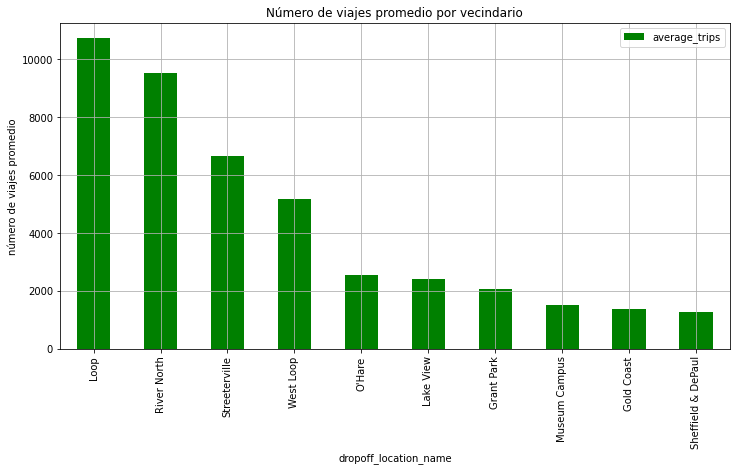

In [23]:
#gráfica de los primeros 10 vecindarios con más destinos
x=data_destinos.pivot_table(index="dropoff_location_name", values="average_trips")
((x.sort_values(by="average_trips", ascending=False)).head(10)).plot(kind="bar", grid=True, figsize=(12,6), title="Número de viajes promedio por vecindario", color="green", ylabel="número de viajes promedio")


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Muy buena gráfica etiquetada correctamente :)
    
</div>

De la gráfica anterior se observa:
1. Loop es el vecindario más visitado en la ciudad con 10727 viajes promedio(19% del total de viajes), tal vez se deba a que es uno de los sitios con más atractivos para turistas.
2. River North es el segundo vecindario más solicitado en los servicios con un promedio de 9523 viajes representando el 17%, es considerado uno de los más lujosos distritos con retaurantes, clubes, etc.
3. Streeterville y West Loop ocupan los 3 y 4 destinos más solicitados con 12% y 9%.
4. O'Hare aparece como el 5 destino solicitado con un promedio de 2546, aproximadamente la mitad del destino anterior.
5. A partir de O'Hare el número de viajes promedio disminuye drásticamente es comparación con los 4 primeros destinos mencionados arriba, representando menos del 5% del total de viajes.
5. Sheffield & DePaul es uno de los destinos menos visitados en el grupo del top 10.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Excelentes comentarios! Genial que calcularas los porcentajes :)   
</div>

<AxesSubplot:title={'center':'Número de viajes por compañia'}, xlabel='company_name', ylabel='número de viajes'>

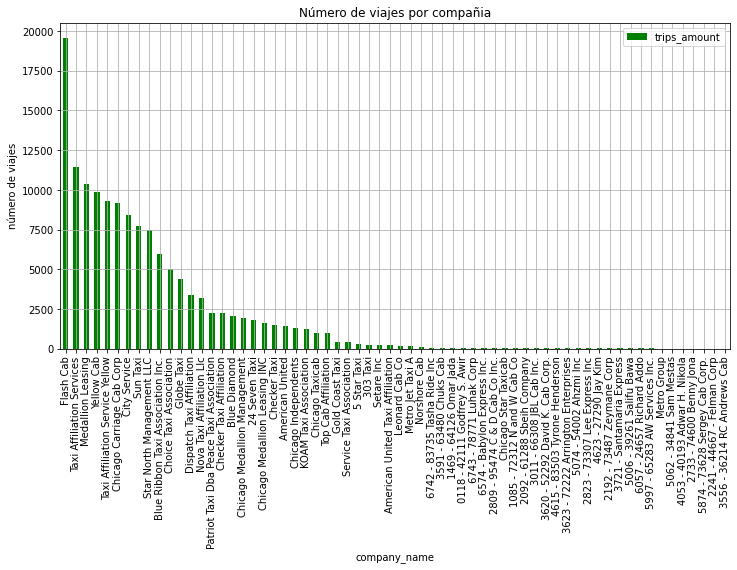

In [24]:
#gráfica de número de viajes por compañia
x1=data_company.pivot_table(index="company_name", values="trips_amount")
x1.sort_values(by="trips_amount", ascending=False).plot(kind="bar", grid=True, figsize=(12,6), title="Número de viajes por compañia", color="green", ylabel="número de viajes")

Se observa que hay compañias con pocas cantidades de viaje, por lo que se procedera a filtrar las 15 compañías que más viajes reportaron

<AxesSubplot:title={'center':'Número de viajes por compañia'}, xlabel='company_name', ylabel='número de viajes'>

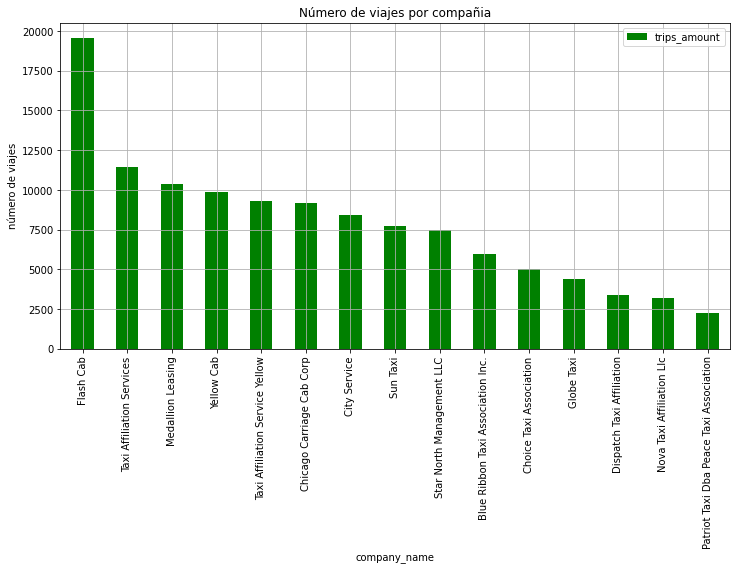

In [25]:
((data_company.sort_values(by="trips_amount", ascending=False)).head(15)).plot(kind="bar", x="company_name", grid=True, figsize=(12,6), title="Número de viajes por compañia", color="green", ylabel="número de viajes")

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Excelente que hicieras una gráfica más para apreciar con mayor detalle compañías importantes :)    
</div>

In [26]:
total_trips_company = data_company["trips_amount"].sum()
data_company["porcentaje"] = ((data_company["trips_amount"] / total_trips_company)*100).astype(int)
data_company.head(15)

,company_name,trips_amount,porcentaje
0,Flash Cab,19558,14
1,Taxi Affiliation Services,11422,8
2,Medallion Leasing,10367,7
3,Yellow Cab,9888,7
4,Taxi Affiliation Service Yellow,9299,6
5,Chicago Carriage Cab Corp,9181,6
6,City Service,8448,6
7,Sun Taxi,7701,5
8,Star North Management LLC,7455,5
9,Blue Ribbon Taxi Association Inc.,5953,4


Definitivamente Flash Cab, es la compañia que más utilizan los clientes de taxis, reportan el 14% del total de viajes, su competidor más cercano (Taxi Affiliation Services) realizo un poco más de la mitad (8%) de los viajes de Flash Cab, seguido muy de cerca por Medallion Leasing y Yellow Cab quienes ocuparon el 3er y cuarto lugar en viajes con 7% cada uno.

Ya a partir de Patriot Taxi Dba Peace Taxi Association el porcentaje de viajes es igual o inferior al 1%. Se obsevan más de 50 compañias de Taxis, pero apenas 1(Flash Cab) supera el 10% del total de viajes.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Muy buenos comentarios!    
</div>

In [27]:
data_clima_depurada["hora"] = data_clima_depurada["start_ts"].dt.hour
data_clima_depurada["dia"] = data_clima_depurada["start_ts"].dt.day
data_clima_depurada["duration_minutes"] = data_clima_depurada["duration_seconds"] / 60

<AxesSubplot:title={'center':'Duración de los viajes por hora respecto al día y clima'}, xlabel='hora', ylabel='duration_minutes'>

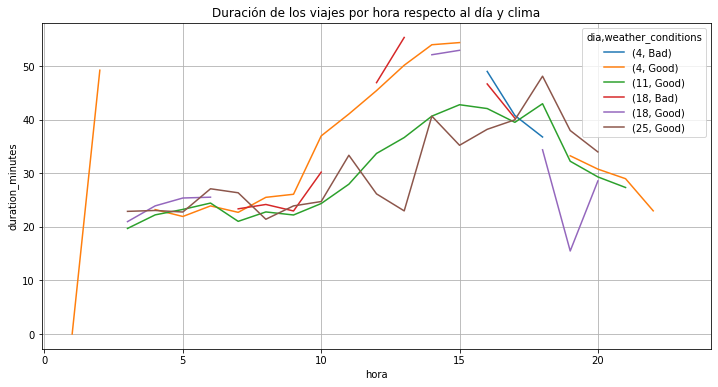

In [28]:
data_clima_depurada.query('hora!=0').pivot_table(index="hora", columns=["dia", "weather_conditions"], values="duration_minutes").plot(kind="line", figsize=(12,6), grid=True, ylabel="duration_minutes", title="Duración de los viajes por hora respecto al día y clima" )

Al analizar el comportamiento por horas se observa:

1. El día 4 de noviembre tuvo en su mayor parte con buen tiempo, solo en la tarde, como par de horas, estuvo lluvioso.
2. Los días 11 y 25 de noviembre estuvieron ideal puesto que se mantuvieron con buenas condiciones climáticas.
3. El día 18 tuvo en su mayor parte con malas condiciones climáticas y si debieron estar muy malas porque hay momentos sin datos reportados, se podría especular que no se brindó el servicio de transporte por muy pero muy malas condiciones metereológicas o tráfico excesivo, solo hacia el principio y final del día estuvo bien el clima.
4. Entre las 10:00 y las 15:00 horas, se reportan los viajes con mayor duración, posiblemente sean las horas de mayor tráfico y hacen el mismo recorrido en mayor tiempo, muy posiblemente a esa hora salgan más vuelos de la ciudad o circulan más vehículos por esa zona.
5. Entre las primeras horas de las mañanas (2:00 - 9:00), los sábados con buen clima, se reportaron viajes de aproximadamente 25 minutos de duración.
6. Entre las 16:00 y 17:00 horas se observa que los viajes tienen más duración los días lluviosos (45 minutos promedio) que los días con buen clima (37 minutos promedio).
7. Ya a partir de las 18:00 horas los viajes comienzan a ser más corto, muy probablemente ya el tráfico disminuye.
8. Entre las 00:00 y las 2:00 de la madrugada del día 4 de noviembre se reportan viajes con alta duración y clima bueno, hacen un poco de ruido esta información, puesto que se esperaría tener el menor tiempo para la misma ruta, ya que por la hora y las buenas condiciones climáticas se esperaría poco tráfico y tiempos de recorrido bajo, habría que tener información adicional para estos datos.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Ok, interesante esta gráfica! gracias por intentar ir más allá en tu proyecto, Liliana :)    
</div>

<div id="hipótesis"/>

## Prueba de Hipótesis

1. Hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los días sábados lluviosos (mal tiempo) es igual a la duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare los días sábados soleados (buen tiempo).

2. Hipótesis alternativa: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare los días sábados lluviosos(mal tiempo) es diferente a la duración promedio de los viajes desde Loop hasta el Aeropuerto Internacional O'Hare los días sábados soleados (buen tiempo).

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Correcta definición de hipótesis!    
</div>

In [29]:
data_clima_depurada_bad = data_clima_depurada.query('weather_conditions == "Bad"')
data_clima_depurada_good = data_clima_depurada.query('weather_conditions == "Good"')


<AxesSubplot:>

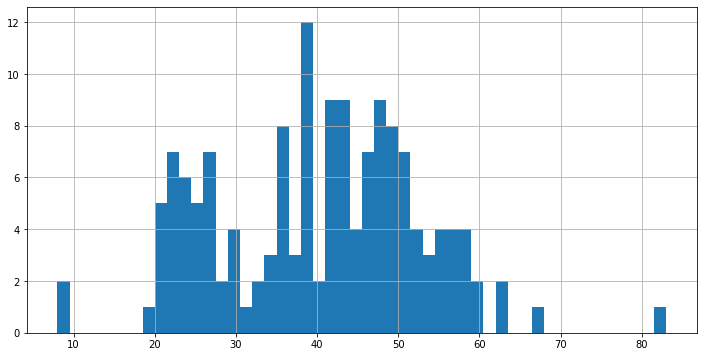

In [30]:
data_clima_depurada_bad["duration_minutes"].hist(bins=50, figsize=(12,6))


<AxesSubplot:>

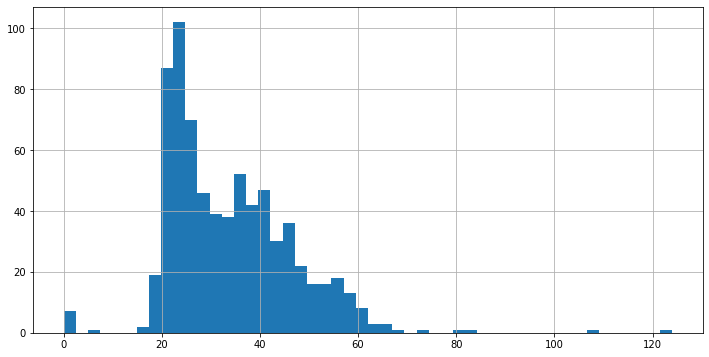

In [31]:
data_clima_depurada_good["duration_minutes"].hist(bins=50, figsize=(12,6))

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Muy bien mostrar histogramas para estas tareas, Valeria :)    
</div>

Comparando los histogramas se observa que:
1. La mayor frecuencia en los días lluviosos se concentra entre los 33 minutos y 60 minutos, con un pico en aproximadamente 40 minutos. Se aprecia además una zona de frecuencia considerada en una duración de 25 minutos. La distribución no es simétrica, sino que muestra asimetría positiva.
2. En el caso de los días soleados, la gráfica también muestra una clara asimetría positiva con la mayor concentración de los datos en aproximadamente 33 minutos. Presenta una cola hacia la derecha con gran concentración de datos entre los 30 y 45 minutos, con datos de menores frecuencia.
3. La mayor cantidad de servicios se presenta en días soleados.
4. Se puede decir que en días lluviosos se incrementa el tiempo de duración del recorrido del viaje para la ruta Loop - Aeropuerto Internacional O'Hare, puesto que muy probablemente hay mayor congestionamiento del tráfico, los choferes disminuyen la velocidad por las condiciones climáticas desfavorables, posibilidades de encontrar mayor cantidad de accidentes, es decir, en días lluviosos el riesgo en la circulación vehicular se intensifica lo cual se traduce en incremento del tiempo de duración de los viajes. En cambio en días soleados, en la misma ruta, se logra hacer el recorrido en menos tiempo.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Correcto!    
</div>

<AxesSubplot:>

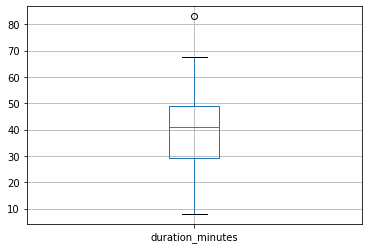

In [32]:
data_clima_depurada_bad.boxplot(column="duration_minutes")

<AxesSubplot:>

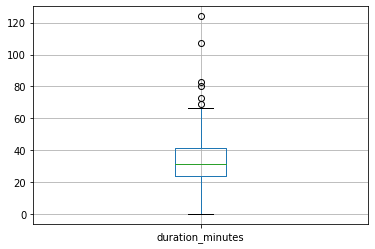

In [33]:
data_clima_depurada_good.boxplot(column="duration_minutes")

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Excelente complementar también con diagramas de caja!    
</div>

Comparando los diagrama de caja se concluye:
1. Los recorridos realizados en los días soleados presentan datos atípicos(recorridos con más de 1 hora de duración), tiempos que parecieran ser para un día soleado con un tráfico insoportable o que un mismo pasajero hiciera la ruta ida por vuelta.
2. La mayor frecuencia en los días soleados, se establece entre la mediana y el tercer cuartil, es decir, tiempos entre 30 y 40 minutos.
3. Para los días lluviosos la mayor cantidad de data se concentra entre el primer cuartil(30 minutos) y la mediana(41 minutos).

In [34]:
data_clima_depurada_bad["duration_seconds"].var()

564819.443463872

In [35]:
data_clima_depurada_good["duration_seconds"].var()

598216.951081022

In [36]:
#Prueba de Levene
alpha=0.05
#hipótesis nula: Las varianzas poblacionales son iguales
stat, p = levene(data_clima_depurada_bad["duration_seconds"],data_clima_depurada_good["duration_seconds"] )
print(p)
if p < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

0.9806770360671218
No rechazamos la hipótesis nula


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Siempre es bueno verificar con prueba de Levene :)    
</div>

El valor de p (mayor al nivel de significación de 0.05), sugiere que la diferencia en las varianzas no es estadísticamente significativa.

In [37]:
#calculo de datos estadísticos para tiempo de duracion de los viajes en días soleados y lluviosos
def funcion_estadistica_describe(df, df1, col):
    p1 = df[col].describe() 
    p2 = df1[col].describe()
    d = pd.concat([p1, p2], axis=1)
    d.columns = ["Resumen estadístico días lluviosos", "Resumen estadístico días soleados"]
    return d

funcion_estadistica_describe(data_clima_depurada_bad, data_clima_depurada_good, "duration_seconds")

,Resumen estadístico días lluviosos,Resumen estadístico días soleados
count,148.000000,723.000000
mean,2409.229730,2032.253112
std,751.544705,773.444860
min,480.000000,0.000000
25%,1746.000000,1435.500000
50%,2463.500000,1883.000000
75%,2940.000000,2491.500000
max,4980.000000,7440.000000


1. Se observa que el 83% de los viajes se realizaron en días soleados, solo el 17% se reportaron en días lluviosos o con mal clima.
2. La media de los viajes en días lluviosos es superior a la media en los días soleados.
3. Se observan datos de duración del viaje de "0" en días con buenas condiciones climáticas, algo que resulta inusual.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Wow! excelente Valeria! no sólo calculas los promedios sino otros datos estadísticos interesantes con esta función de arriba :)    
</div>

In [38]:
#cálculo de la probabilidad para comprobar hipótesis nula
sample1=data_clima_depurada_bad["duration_seconds"]
sample2=data_clima_depurada_good["duration_seconds"]
alpha = 0.05
results = st.ttest_ind(sample1, sample2, equal_var=True)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  7.397770692813604e-08
Rechazamos la hipótesis nula


Con este resultado se afirma que hay suficiente evidencia para rechazar la hipótesis nula que establece que la media de duración de los viajes de Loop - Aeropuerto Internacional O'Hare era igual tanto en días soleados como en días lluviosos.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Bien aplicada la prueba T y bien interpretados sus resultados!    
</div>

<div id="Conclusiones"/>

## Conclusiones

Se analizó la información de 3 dataframe:

1. Datos de compañías de taxi con 2 columnas, 64 registros sin datos ausentes.
2. Datos de destinos de los pasajeros con 2 columnas y 94 registros sin datos ausentes.
3. Datos del clima para los viajes Loop - Aeropuesto Internacional O'Hare con 1068 registros sin datos ausentes.
4. El dataFrame datos_clima tenía 197 registros duplicados, los cuales fueron eliminados quedando un total de 871 resgistros.
5. Las gráficas de los datos muestran que las compañias Flash Cab y Taxi Affilitation Services son las más utilizadas por los clientes, tal vez son más confiables, tienen más presencia(mayor cantidad de unidades), cumplen con los permisos, etc....
6. Loop es el destino al que más acuden los clientes.
7. Streeterville y West Loop ocupan los 3 y 4 destinos más solicitados con 12% y 9%.
8. O'Hare aparece como el 5 destino solicitado con un promedio de 2546, aproximadamente la mitad del destino anterior.
9. Sheffield & DePaul es uno de los destinos menos visitados en el grupo del top 10.
10. En el mes de noviembre se presentaron 2 sábados con buen clima 11 y 25.
11. El día 4 de noviembre tuvo en su mayor parte con buen tiempo, solo en la tarde, como par de horas, estuvo lluvioso.
12. En los días lluviosos, en comparación con los días soleados, se hace el mismo recorrido en más tiempo.
13. Entre las primeras horas de las mañanas (2:00 - 9:00), los sábados con buen clima, se reportaron viajes de aproximadamente 25 minutos de duración.
14. Hay suficiente evidencia para rechazar la hipótesis nula que establecía que la media de duración de los viajes de Loop - Aeropuerto Internacional O'Hare era igual tanto en días soleados como en días lluviosos.


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Perfectas conclusiones recapitulándolo todo, Valeria :)</div>